# Kevin Davindio Atha

## Import library

In [ ]:
# Warnings
import warnings
warnings.simplefilter('ignore')

# Data Manipulation
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# Preprocessing And Features Selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Model And Evaluation
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# Handling Imbalance Data
from imblearn.over_sampling import SMOTE

# Google Colab
from google.colab import drive


## EDA

### Read data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/home credit/application_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/home credit/application_test.csv')

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Describe

In [ ]:
print("***Data Train***")
df_train.info()
print()
print("***Data Test***")
df_test.info()

***Data Train***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

***Data Test***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


### Check missing values and duplicates

##### Data Train

In [ ]:
print('Train Data Missing Value ',df_train.isnull().sum().sum())
print('Train Data Duplicate Value ',df_train.duplicated().sum())

Train Data Missing Value  9152465
Train Data Duplicate Value  0


In [ ]:
# Check the percentage of missing values
missing_percent_data_train = df_train.isnull().mean() * 100
missing_percent_data_train = missing_percent_data_train[missing_percent_data_train > 0]
print(missing_percent_data_train)

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 67, dtype: float64


In [ ]:
# Check Rows And Colums
print(f"rows: {df_train.shape[0]}, columnn: {df_train.shape[1]} ")

rows: 307511, columnn: 122 


##### Data Test

In [ ]:
print('Test Data Missing Value ',df_test.isnull().sum().sum())
print('Test Data Duplicate Value ',df_test.duplicated().sum())

Test Data Missing Value  1404419
Test Data Duplicate Value  0


In [ ]:
# Check the percentage of missing values
missing_percent_data_test = df_test.isnull().mean() * 100
missing_percent_data_test = missing_percent_data_test[missing_percent_data_test > 0]
print(missing_percent_data_test)

AMT_ANNUITY                    0.049237
NAME_TYPE_SUITE                1.868948
OWN_CAR_AGE                   66.289184
OCCUPATION_TYPE               32.014197
EXT_SOURCE_1                  42.122107
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     12.409732
AMT_REQ_CREDIT_BUREAU_WEEK    12.409732
AMT_REQ_CREDIT_BUREAU_MON     12.409732
AMT_REQ_CREDIT_BUREAU_QRT     12.409732
AMT_REQ_CREDIT_BUREAU_YEAR    12.409732
Length: 64, dtype: float64


In [ ]:
# Check Rows And Columns
print(f"rows: {df_test.shape[0]}, columnn: {df_test.shape[1]} ")

rows: 48744, columnn: 121 


### Numeric Columns and Objects

##### Data Train

In [ ]:
# Check Object Column
object_column_train = df_train.select_dtypes(include='object').columns
print(len(object_column_train))
print(object_column_train)

16
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [ ]:
# Unique values Object columns
for column in object_column_train:
    unique_values = df_train[column].unique()
    print(f"Unique values in object column '{column}':")
    print(unique_values)
    print()

Unique values in object column 'NAME_CONTRACT_TYPE':
['Cash loans' 'Revolving loans']

Unique values in object column 'CODE_GENDER':
['M' 'F' 'XNA']

Unique values in object column 'FLAG_OWN_CAR':
['N' 'Y']

Unique values in object column 'FLAG_OWN_REALTY':
['Y' 'N']

Unique values in object column 'NAME_TYPE_SUITE':
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Unique values in object column 'NAME_INCOME_TYPE':
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Unique values in object column 'NAME_EDUCATION_TYPE':
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Unique values in object column 'NAME_FAMILY_STATUS':
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Unique values in object column 'NAME_HOUSING_TYPE':
['House / apartment' 'Rented apartment' 'With parents'
 

In [ ]:
# Check Numeric columns
numeric_column_train = df_train.select_dtypes(include='number').columns
print(len(numeric_column_train))
print(numeric_column_train)

106
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)


In [ ]:
# Unique values Numeric columns
for column in numeric_column_train:
    unique_values = df_train[column].unique()
    print(f"Unique values in numeric column '{column}':")
    print(unique_values)
    print()

Unique values in numeric column 'SK_ID_CURR':
[100002 100003 100004 ... 456253 456254 456255]

Unique values in numeric column 'TARGET':
[1 0]

Unique values in numeric column 'CNT_CHILDREN':
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]

Unique values in numeric column 'AMT_INCOME_TOTAL':
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]

Unique values in numeric column 'AMT_CREDIT':
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]

Unique values in numeric column 'AMT_ANNUITY':
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]

Unique values in numeric column 'AMT_GOODS_PRICE':
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]

Unique values in numeric column 'REGION_POPULATION_RELATIVE':
[0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.031329 0.016612 0.010006 0.020713 0.010966
 0.04622  0.025164 0.006296 0.026392 0.018029 0.019101 0.030755 0.008575
 0.01885  0.006207 0.009175 0.007

### Data Visualization

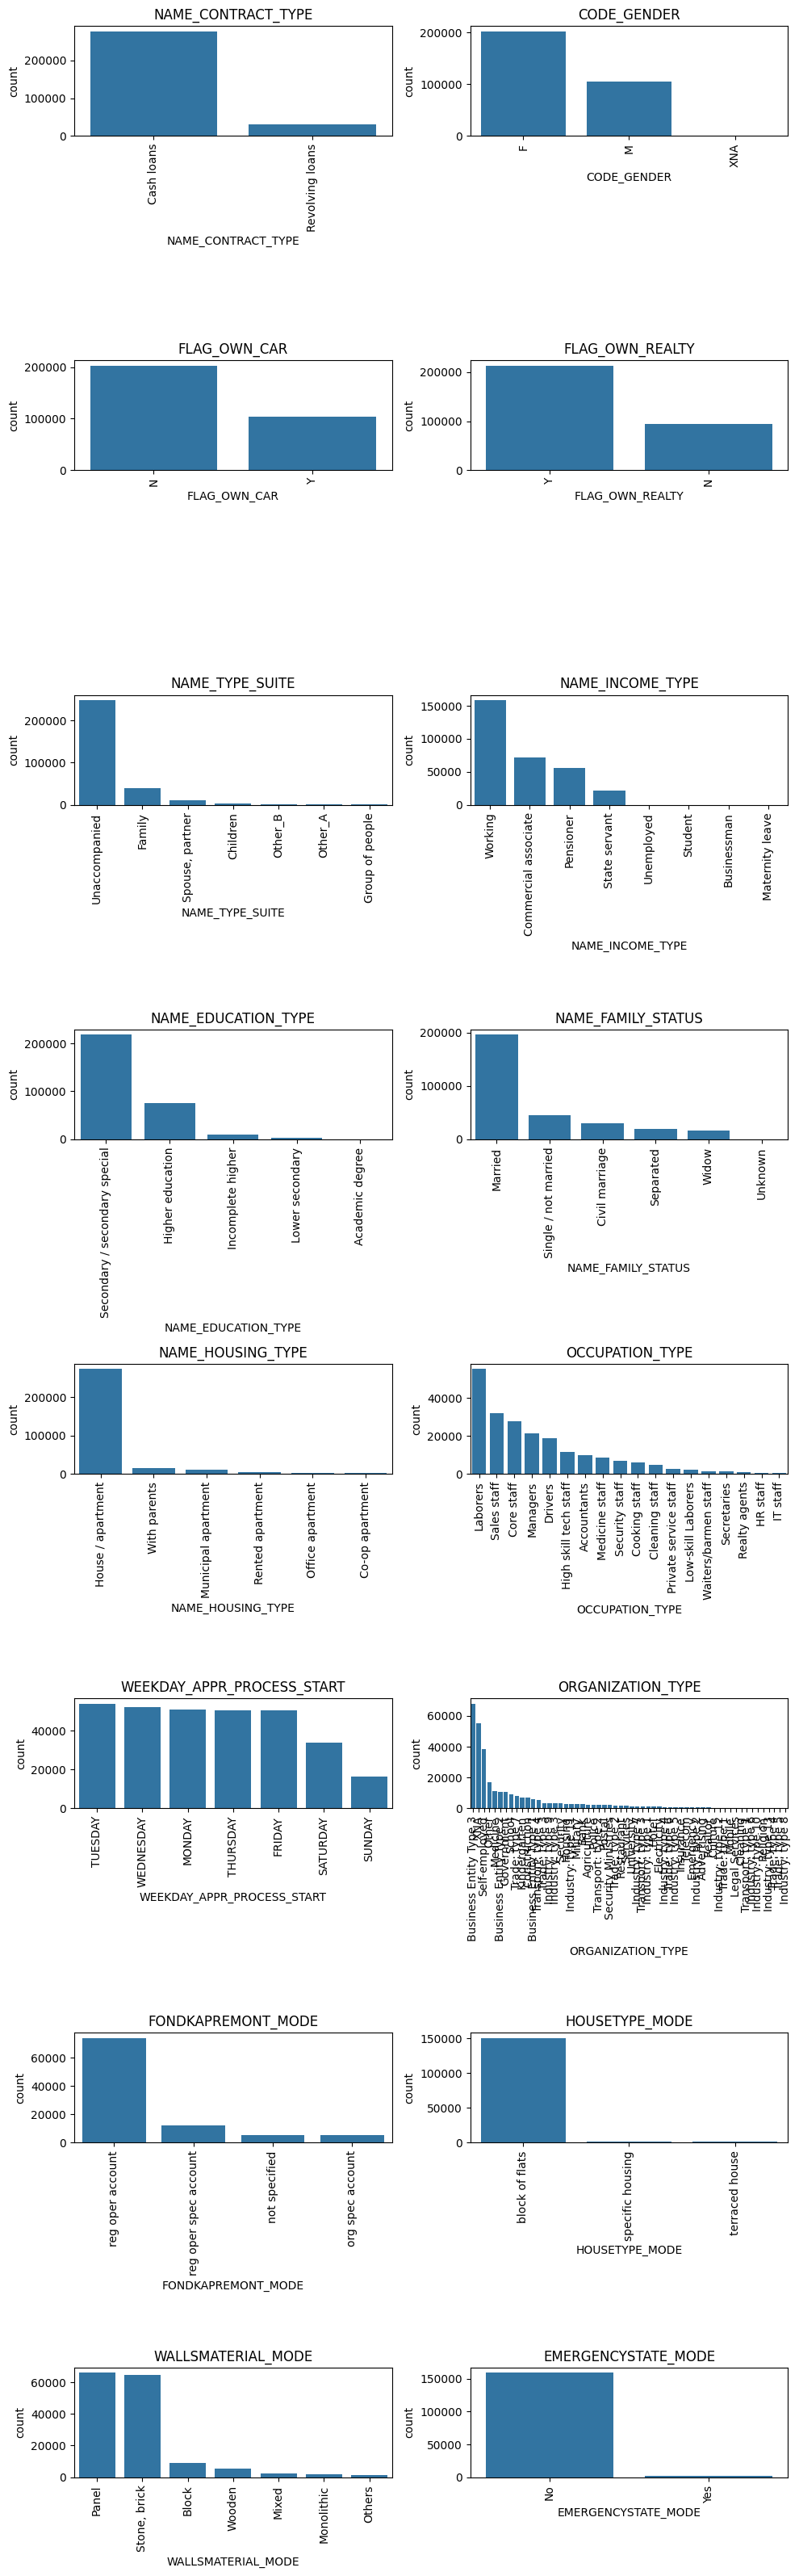

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 2
n_rows = -(-len(object_column_train) // n_cols)
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(object_column_train, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90)  # Rotasi label biar tidak tumpang tindih
    plt.tight_layout()

plt.show()


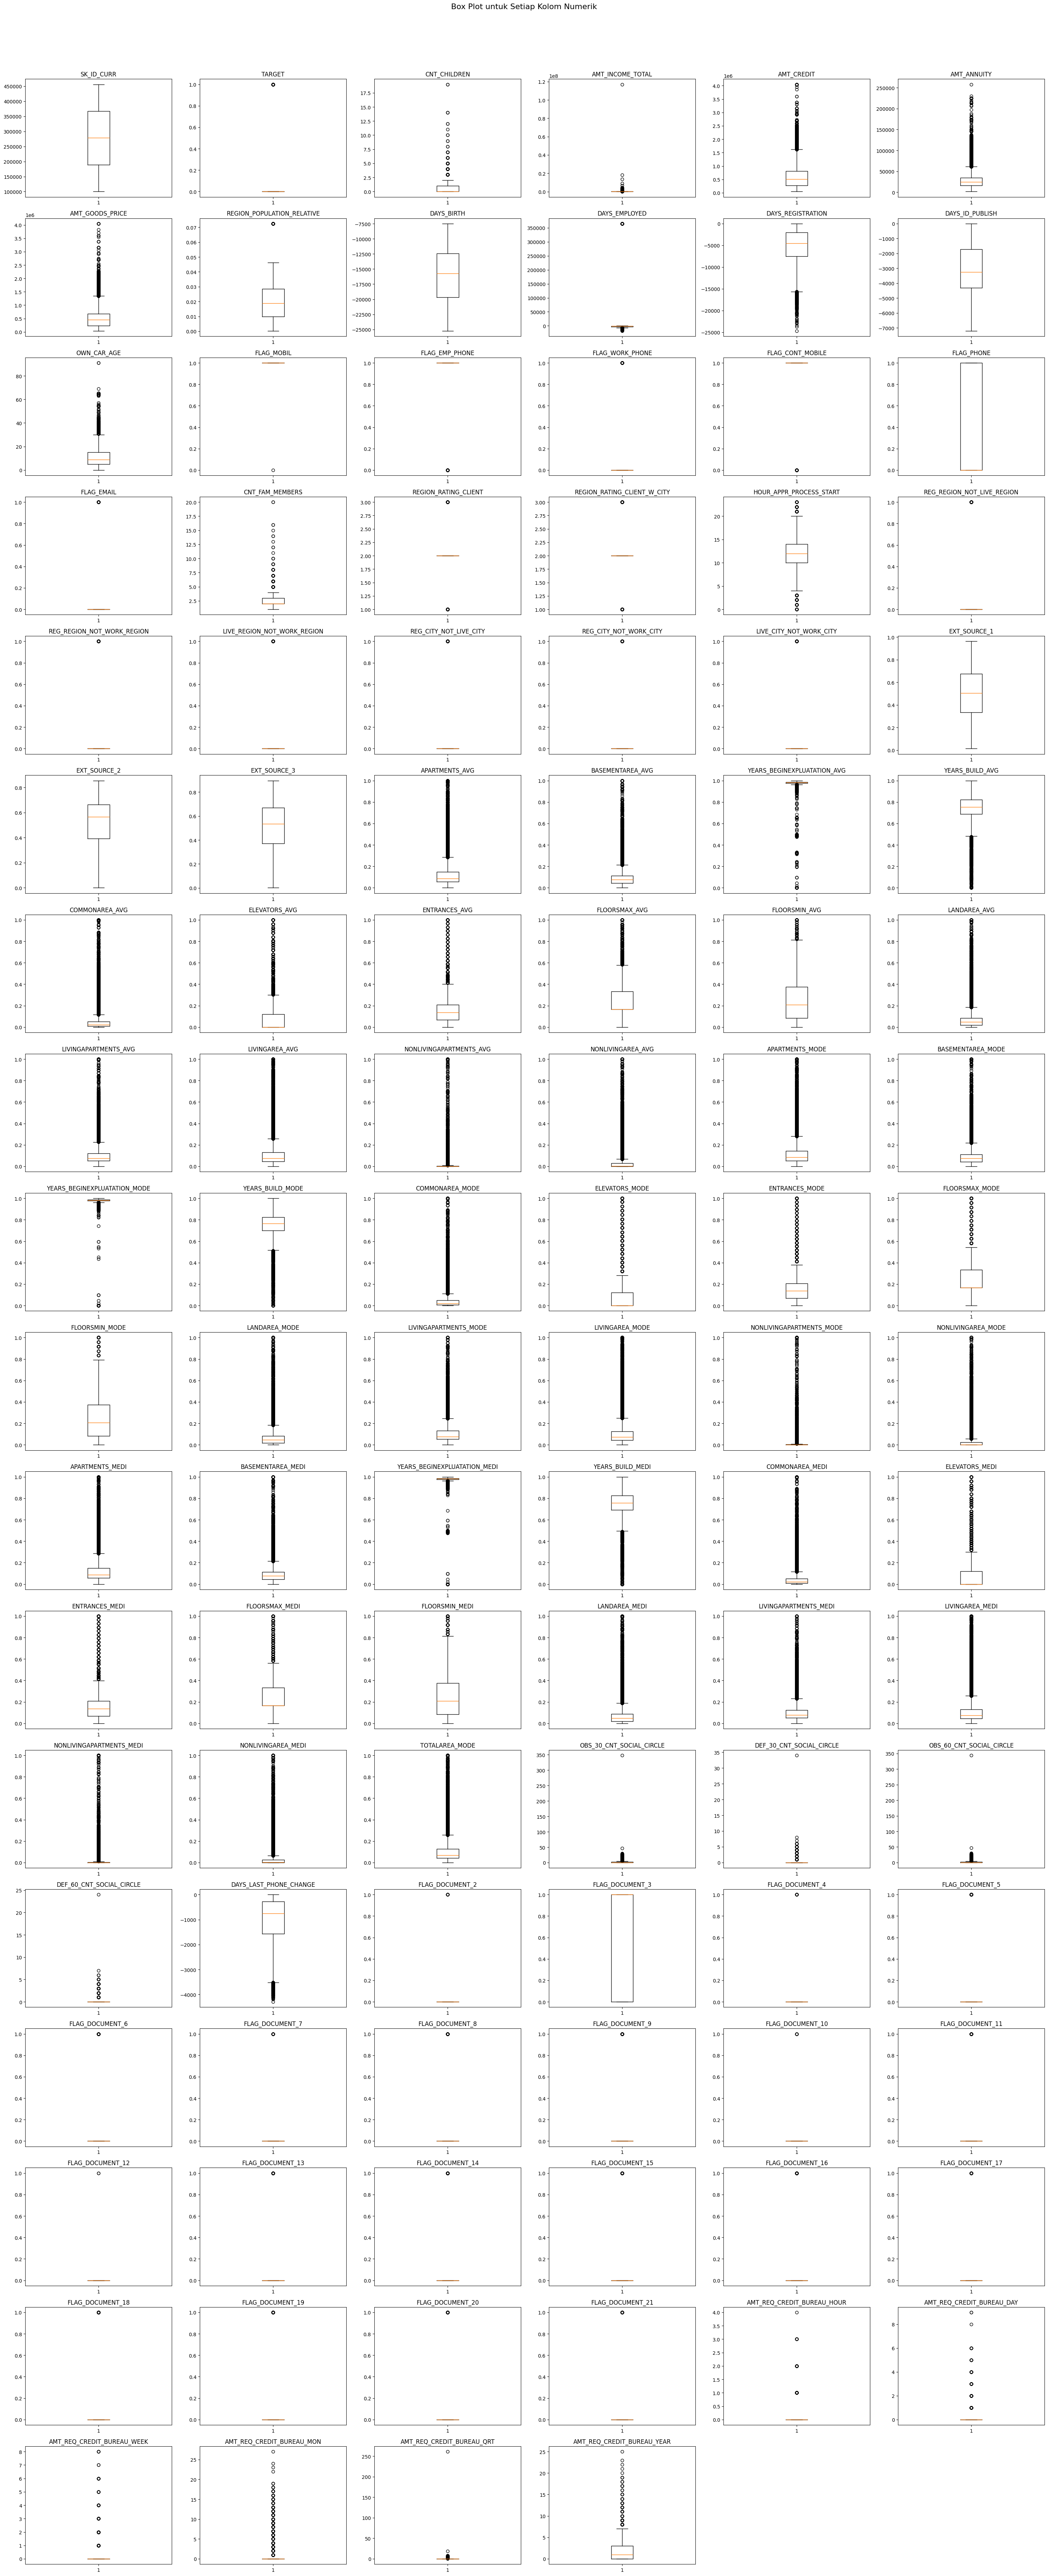

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = df_train.select_dtypes(include='number').columns
n_cols = 6
n_rows = -(-len(numerical_columns) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.boxplot(df_train[col].dropna())
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plot untuk Setiap Kolom Numerik", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

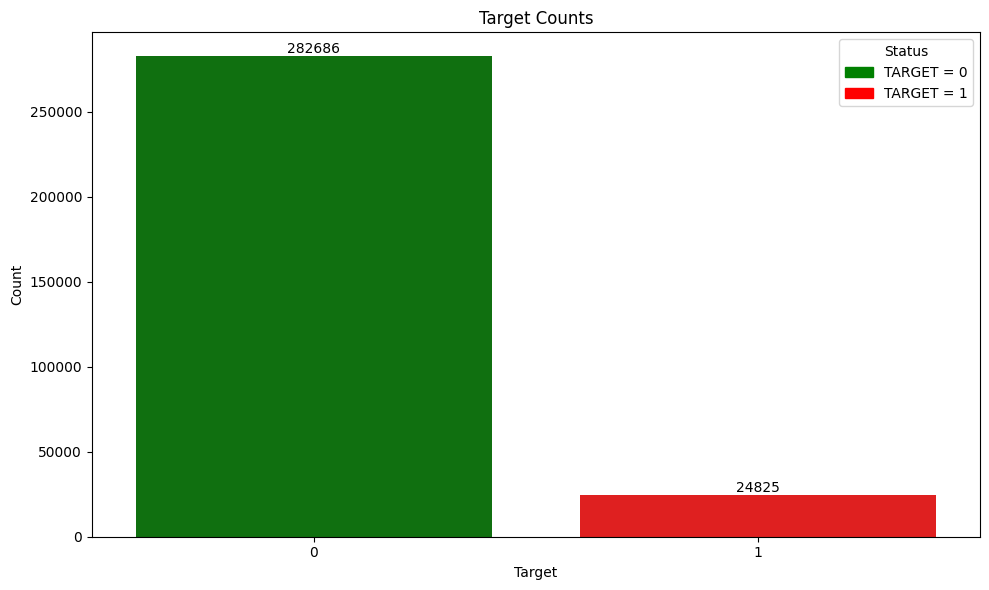

Target Counts:
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

df_train['TARGET'] = df_train['TARGET'].astype(str)

ax = sns.countplot(
    x='TARGET',
    data=df_train,
    palette={'0': 'green', '1': 'red'},
    order=['0', '1']
)

plt.title("Target Counts")
plt.xlabel("Target")
plt.ylabel("Count")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10
            )

from matplotlib.patches import Patch
legend_labels = [Patch(color='green', label='TARGET = 0'), Patch(color='red', label='TARGET = 1')]
plt.legend(handles=legend_labels, title='Status')

plt.tight_layout()
plt.show()

targetcounts = df_train['TARGET'].value_counts()
print("Target Counts:")
print(targetcounts)


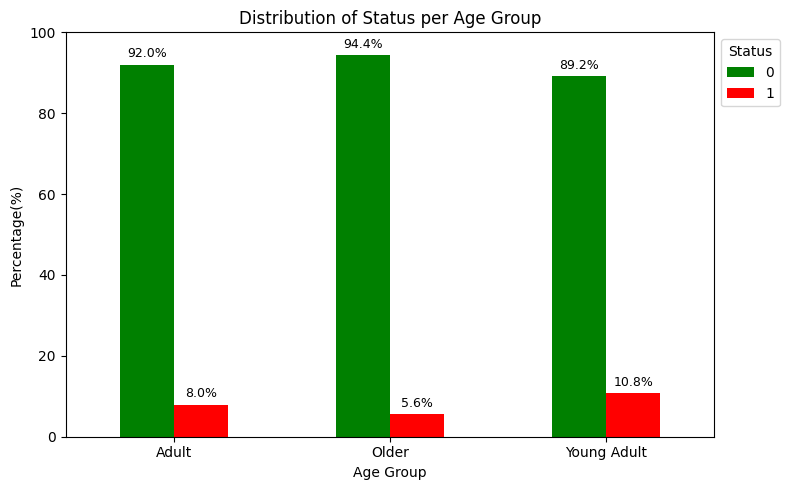

In [ ]:
df_age = df_train.copy()
df_age['Age'] = np.floor(df_age['DAYS_BIRTH'] / -365).astype(int)
df_age.drop(columns='DAYS_BIRTH', inplace=True)

# Age Category
age_cat = []
for i in df_age['Age']:
    if i < 36:
        age_cat.append('Young Adult')
    elif i < 51:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')
df_age['AgeGroup'] = age_cat

grouped = df_age.groupby('AgeGroup')['TARGET'].value_counts(normalize=True).unstack().fillna(0) * 100

custom_colors = ['green', 'red']

# Plot
ax = grouped.plot(kind='bar', stacked=False, color=custom_colors, figsize=(8, 5))
plt.title("Distribution of Status per Age Group")
plt.ylabel("Percentage(%)")
plt.xlabel("Age Group")
plt.ylim(0, 100)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height + 1),
                    ha='center', va='bottom', fontsize=9)

plt.legend(['0', '1'], title='Status', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

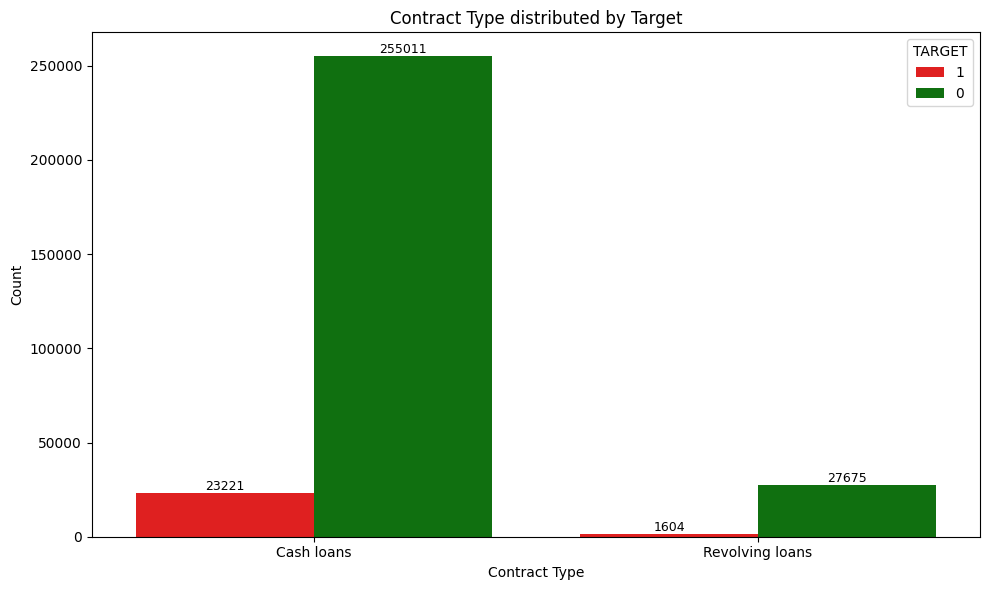

In [ ]:
plt.figure(figsize=(10, 6))

df_train['TARGET'] = df_train['TARGET'].astype(str)

ax = sns.countplot(
    x='NAME_CONTRACT_TYPE',
    data=df_train,
    hue="TARGET",
    palette={'0': 'green', '1': 'red'}
)

plt.title('Contract Type distributed by Target')
plt.xlabel("Contract Type")
plt.ylabel("Count")

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9
            )

plt.tight_layout()
plt.show()


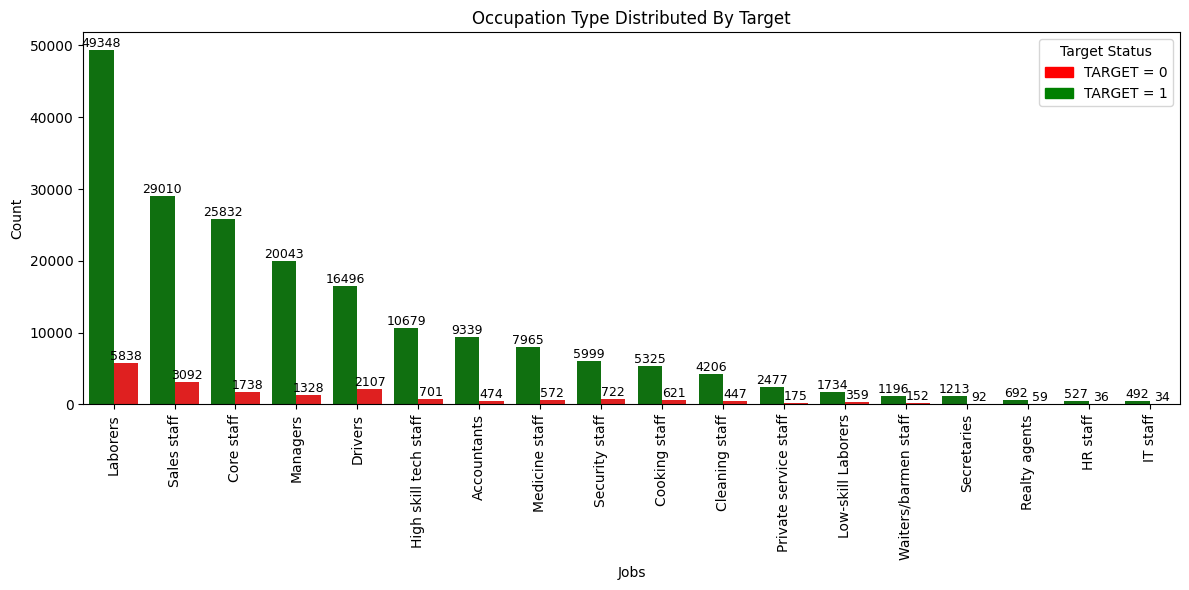

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

df_train['TARGET'] = df_train['TARGET'].astype(int)

order = df_train['OCCUPATION_TYPE'].value_counts().index

ax = sns.countplot(
    x='OCCUPATION_TYPE',
    hue='TARGET',
    data=df_train,
    order=order,
    palette={0: 'green', 1: 'red'}
)

plt.title("Occupation Type Distributed By Target")
plt.xlabel("Jobs")
plt.ylabel("Count")
plt.xticks(rotation=90)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=9
            )

legend_labels = [Patch(color='red', label='TARGET = 0'), Patch(color='green', label='TARGET = 1')]
plt.legend(handles=legend_labels, title='Target Status')

plt.tight_layout()
plt.show()


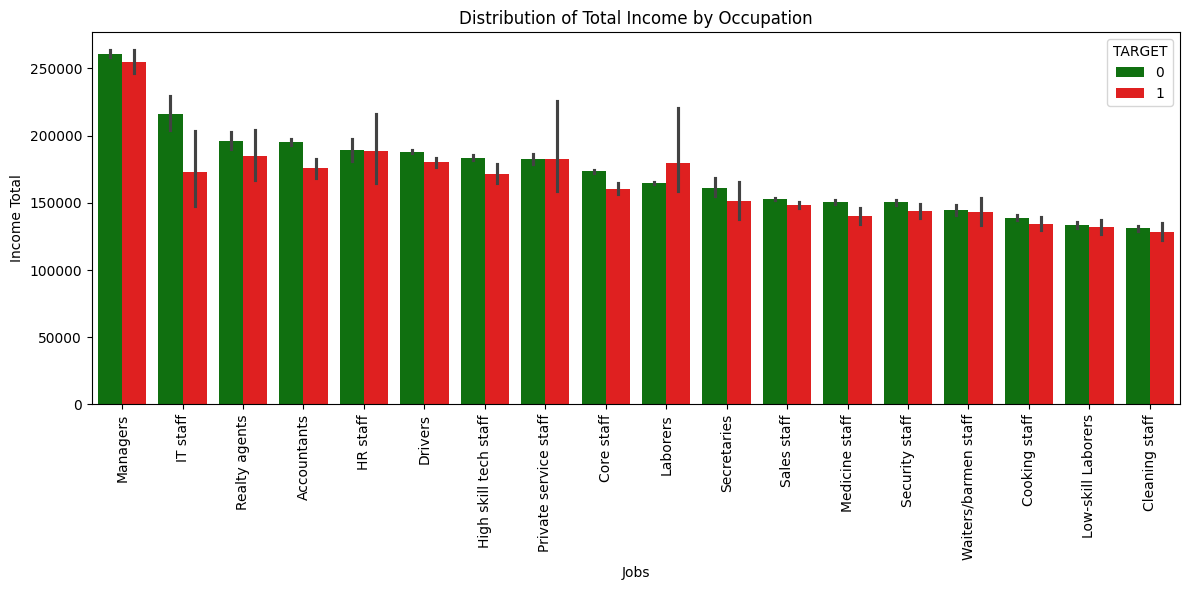

In [ ]:
plt.figure(figsize=(12, 6))

order = df_train.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values(ascending=False).index

sns.barplot(x='OCCUPATION_TYPE',
            y='AMT_INCOME_TOTAL',
            data=df_train,
            hue="TARGET",
            palette={0: 'green', 1: 'red'},
            order=order)

plt.title("Distribution of Total Income by Occupation")
plt.xlabel("Jobs")
plt.ylabel("Income Total")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Preprocessing Data

In [ ]:
# Delete columns that have a missing values ​​percentage of more than 50%
missing_percent_data_train = df_train.isnull().mean() * 100
missing_percent_data_test = df_test.isnull().mean() * 100
df_train_cleaned = df_train.drop(columns=missing_percent_data_train[missing_percent_data_train > 50].index)
df_test_cleaned = df_test.drop(columns=missing_percent_data_test[missing_percent_data_train > 50].index)
print("Data train")
print(f"before: {df_train.shape[1]}, after: {df_train_cleaned.shape[1]}")
print()
print("Data test")
print(f"before: {df_test.shape[1]}, after: {df_test_cleaned.shape[1]}")

Data train
before: 122, after: 81

Data test
before: 121, after: 80


In [ ]:
# Check Rows And Columns
print(f"Data Train Rows: {df_train_cleaned.shape[0]}, columnn: {df_train_cleaned.shape[1]} ")
print(f"Data Test Rows: {df_test_cleaned.shape[0]}, columnn: {df_test_cleaned.shape[1]} ")

Data Train Rows: 307511, columnn: 81 
Data Test Rows: 48744, columnn: 80 


##### Handling Missing Values Data train

In [ ]:
# Display columns from the object column train that have at least one NaN
object_column_train_cleaned = df_train_cleaned.select_dtypes(include='object').columns
cols_object_train_with_nan = [col for col in object_column_train_cleaned if df_train_cleaned[col].isna().any()]

# Display columns from the numeric column train that have at least one NaN
numeric_column_train_cleaned = df_train_cleaned.select_dtypes(include='number').columns
cols_numeric_train_with_nan = [col for col in numeric_column_train_cleaned if df_train_cleaned[col].isna().any()]

# Object Cols Data Train With nan
print("Data Categoric Train")
for column in cols_object_train_with_nan:
    unique_values = df_train_cleaned[column].unique()
    print(f"Unique values in object column '{column}':")
    print(unique_values)
    print()

# Numeric Cols Data Train With nan
print("Data Numeric Train")
for column in cols_numeric_train_with_nan:
    unique_values = df_train_cleaned[column].unique()
    print(f"Unique values in numeric column '{column}':")
    print(unique_values)
    print()

Data Categoric Train
Unique values in object column 'NAME_TYPE_SUITE':
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Unique values in object column 'OCCUPATION_TYPE':
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']

Unique values in object column 'EMERGENCYSTATE_MODE':
['No' nan 'Yes']

Data Numeric Train
Unique values in numeric column 'AMT_ANNUITY':
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]

Unique values in numeric column 'AMT_GOODS_PRICE':
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]

Unique values in numeric column 'CNT_FAM_MEMBERS':
[ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14. 12. 20. 15. 16. 11.]

Unique values in numeric column 'EXT_SOURCE_2':

In [ ]:
df_train_cleaned[cols_object_train_with_nan].isna().sum()

,0
NAME_TYPE_SUITE,1292
OCCUPATION_TYPE,96391
EMERGENCYSTATE_MODE,145755


In [ ]:
df_train_cleaned[cols_numeric_train_with_nan].isna().sum()

,0
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
CNT_FAM_MEMBERS,2
EXT_SOURCE_2,660
EXT_SOURCE_3,60965
YEARS_BEGINEXPLUATATION_AVG,150007
FLOORSMAX_AVG,153020
YEARS_BEGINEXPLUATATION_MODE,150007
FLOORSMAX_MODE,153020
YEARS_BEGINEXPLUATATION_MEDI,150007


In [ ]:
# Impute missing values for categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_train_cleaned[cols_object_train_with_nan] = categorical_imputer.fit_transform(df_train_cleaned[cols_object_train_with_nan])

# Impute missing values for numeric columns with median
numeric_imputer = SimpleImputer(strategy='median')
df_train_cleaned[cols_numeric_train_with_nan] = categorical_imputer.fit_transform(df_train_cleaned[cols_numeric_train_with_nan])

In [ ]:
# Check again object cols data train With nan
for column in cols_object_train_with_nan:
    unique_values = df_train_cleaned[column].unique()
    print(f"Unique values in object column '{column}':")
    print(unique_values)
    print()

Unique values in object column 'NAME_TYPE_SUITE':
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']

Unique values in object column 'OCCUPATION_TYPE':
['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']

Unique values in object column 'EMERGENCYSTATE_MODE':
['No' 'Yes']



In [ ]:
# Check again numeric cols data train With nan
for column in cols_numeric_train_with_nan:
    unique_values = df_train_cleaned[column].unique()
    print(f"Unique values in numeric column '{column}':")
    print(unique_values)
    print()

Unique values in numeric column 'AMT_ANNUITY':
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]

Unique values in numeric column 'AMT_GOODS_PRICE':
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]

Unique values in numeric column 'CNT_FAM_MEMBERS':
[ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. 14. 12. 20. 15. 16. 11.]

Unique values in numeric column 'EXT_SOURCE_2':
[0.26294859 0.62224578 0.55591208 ... 0.13118876 0.26448565 0.2678342 ]

Unique values in numeric column 'EXT_SOURCE_3':
[1.39375780e-01 7.46300213e-01 7.29566691e-01 6.21226338e-01
 4.92060094e-01 5.40654450e-01 7.51723715e-01 3.63945239e-01
 6.52896552e-01 1.76652579e-01 7.70087070e-01 6.78567689e-01
 6.21030378e-02 5.56727426e-01 4.77649155e-01 5.42445144e-01
 3.58951229e-01 6.69056695e-01 5.65607981e-01 4.61482391e-01
 1.90705948e-01 6.59405532e-01 5.24496446e-01 4.10102573e-01
 7.98137231e-01 4.11848556e-01 7.54406173e-01 7.22392890e-01
 6.05836265e-01 3.20163367e-01 3.99675616e-01 6.84827659e-01
 

##### Handling Missing Values Data Test

In [ ]:
# Display columns from the object column test that have at least one NaN
object_column_test_cleaned = df_test_cleaned.select_dtypes(include='object').columns
cols_object_test_with_nan = [col for col in object_column_test_cleaned if df_test_cleaned[col].isna().any()]

# Display columns from the numeric column train that have at least one NaN
numeric_column_test_cleaned = df_test_cleaned.select_dtypes(include='number').columns
cols_numeric_test_with_nan = [col for col in numeric_column_test_cleaned if df_test_cleaned[col].isna().any()]

# Object Cols Data test With nan
print("Data Categoric test")
for column in cols_object_test_with_nan:
    unique_values = df_test_cleaned[column].unique()
    print(f"Unique values in object column '{column}':")
    print(unique_values)
    print()

# Numeric Cols Data test With nan
print("Data Numeric test")
for column in cols_numeric_test_with_nan:
    unique_values = df_test_cleaned[column].unique()
    print(f"Unique values in numeric column '{column}':")
    print(unique_values)
    print()

Data Categoric test
Unique values in object column 'NAME_TYPE_SUITE':
['Unaccompanied' nan 'Family' 'Spouse, partner' 'Group of people'
 'Other_B' 'Children' 'Other_A']

Unique values in object column 'OCCUPATION_TYPE':
[nan 'Low-skill Laborers' 'Drivers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Laborers' 'Managers' 'Accountants' 'Medicine staff'
 'Security staff' 'Private service staff' 'Secretaries' 'Cleaning staff'
 'Cooking staff' 'HR staff' 'Waiters/barmen staff' 'Realty agents'
 'IT staff']

Unique values in object column 'EMERGENCYSTATE_MODE':
['No' nan 'Yes']

Data Numeric test
Unique values in numeric column 'AMT_ANNUITY':
[20560.5 17370.  69777.  ... 37917.  40824.  46660.5]

Unique values in numeric column 'EXT_SOURCE_2':
[0.78965435 0.29165553 0.69978683 ... 0.63276955 0.44570098 0.45654067]

Unique values in numeric column 'EXT_SOURCE_3':
[1.59519540e-01 4.32961667e-01 6.10991328e-01 6.12704244e-01
            nan 3.92773861e-01 6.51260219e-01 3.12365369e-01
 5

In [ ]:
df_test_cleaned[cols_object_test_with_nan].isna().sum()

,0
NAME_TYPE_SUITE,911
OCCUPATION_TYPE,15605
EMERGENCYSTATE_MODE,22209


In [ ]:
df_test_cleaned[cols_numeric_test_with_nan].isna().sum()

,0
AMT_ANNUITY,24
EXT_SOURCE_2,8
EXT_SOURCE_3,8668
YEARS_BEGINEXPLUATATION_AVG,22856
FLOORSMAX_AVG,23321
YEARS_BEGINEXPLUATATION_MODE,22856
FLOORSMAX_MODE,23321
YEARS_BEGINEXPLUATATION_MEDI,22856
FLOORSMAX_MEDI,23321
TOTALAREA_MODE,22624


In [ ]:
# Impute missing values for categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_test_cleaned[cols_object_test_with_nan] = categorical_imputer.fit_transform(df_test_cleaned[cols_object_test_with_nan])

# Impute missing values for numeric columns with median
numeric_imputer = SimpleImputer(strategy='median')
df_test_cleaned[cols_numeric_test_with_nan] = categorical_imputer.fit_transform(df_test_cleaned[cols_numeric_test_with_nan])

In [ ]:
# Check again object cols data test with nan
print("Data Categoric test")
for column in cols_object_test_with_nan:
    unique_values = df_test_cleaned[column].unique()
    print(f"Unique values in object column '{column}':")
    print(unique_values)
    print()

Data Categoric test
Unique values in object column 'NAME_TYPE_SUITE':
['Unaccompanied' 'Family' 'Spouse, partner' 'Group of people' 'Other_B'
 'Children' 'Other_A']

Unique values in object column 'OCCUPATION_TYPE':
['Laborers' 'Low-skill Laborers' 'Drivers' 'Sales staff'
 'High skill tech staff' 'Core staff' 'Managers' 'Accountants'
 'Medicine staff' 'Security staff' 'Private service staff' 'Secretaries'
 'Cleaning staff' 'Cooking staff' 'HR staff' 'Waiters/barmen staff'
 'Realty agents' 'IT staff']

Unique values in object column 'EMERGENCYSTATE_MODE':
['No' 'Yes']



In [ ]:
# Check again numeric cols data test With nan
print("Data Numeric test")
for column in cols_numeric_test_with_nan:
    unique_values = df_test_cleaned[column].unique()
    print(f"Unique values in numeric column '{column}':")
    print(unique_values)
    print()

Data Numeric test
Unique values in numeric column 'AMT_ANNUITY':
[20560.5 17370.  69777.  ... 37917.  40824.  46660.5]

Unique values in numeric column 'EXT_SOURCE_2':
[0.78965435 0.29165553 0.69978683 ... 0.63276955 0.44570098 0.45654067]

Unique values in numeric column 'EXT_SOURCE_3':
[1.59519540e-01 4.32961667e-01 6.10991328e-01 6.12704244e-01
 7.06205110e-01 3.92773861e-01 6.51260219e-01 3.12365369e-01
 5.22697317e-01 1.94067828e-01 2.98594990e-01 4.36506499e-01
 4.15347145e-01 3.75711010e-01 5.79727423e-01 2.63646813e-01
 3.06202298e-01 6.52896552e-01 3.47418227e-01 7.61026370e-01
 7.46300213e-01 4.40057830e-01 6.62637792e-01 5.35276250e-01
 4.74051289e-01 5.95456203e-01 3.57293268e-01 2.53962809e-01
 5.67379237e-01 6.33031641e-01 5.46023197e-01 6.76992503e-01
 3.20163367e-01 7.20944150e-01 3.00107757e-01 6.81705878e-01
 4.92060094e-01 1.64414179e-01 8.21443313e-01 1.85202082e-01
 4.45396242e-01 6.56158373e-01 2.83711883e-01 5.13693766e-01
 4.06617437e-01 2.09154699e-01 6.9866755

In [ ]:
# Check missing Values
print('Check Missing Values Train',df_train_cleaned.isna().sum().sum())
print('Check Missing Values Test',df_test_cleaned.isna().sum().sum())

Check Missing Values Train 0
Check Missing Values Test 0


In [ ]:
# Check Rows
print(f"Data Train Rows: {df_train_cleaned.shape[0]}, columnn: {df_train_cleaned.shape[1]} ")
print(f"Data Test Rows: {df_test_cleaned.shape[0]}, columnn: {df_test_cleaned.shape[1]} ")

Data Train Rows: 307511, columnn: 81 
Data Test Rows: 48744, columnn: 80 


##### Remove XNA in CODE_GENDER column

In [ ]:
df_train_cleaned['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


In [ ]:
# Remove unknown gender
df_train_cleaned = df_train_cleaned[df_train_cleaned['CODE_GENDER'] != 'XNA']
df_train_cleaned['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202448
M,105059


##### Handling Outliers

In [ ]:
def handling_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_final

df_outliers = df_train_cleaned.copy()
columns_to_process = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED']
selected_columns = df_train_cleaned[columns_to_process]

processed_columns = handling_outlier(selected_columns)
df_outliers[columns_to_process] = processed_columns

In [ ]:
# Check missing values
print('Check Missing Values Train',df_train_cleaned.isna().sum().sum())
print('Check Missing Values Outlier',df_outliers.isna().sum().sum())
print('Check Missing Values Test',df_test_cleaned.isna().sum().sum())

Check Missing Values Train 0
Check Missing Values Outlier 86251
Check Missing Values Test 0


In [ ]:
# Impute missing values for categorical columns with mode
outliers_imputer = SimpleImputer(strategy='most_frequent')
df_outliers[['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED']] = outliers_imputer.fit_transform(df_outliers[['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED']])

In [ ]:
print('Check Missing Values Outlier',df_outliers.isna().sum().sum())

Check Missing Values Outlier 0


In [ ]:
# Rows and columns data train and test
print("Data train")
print(f"rows: {df_train_cleaned.shape[1]}, columnn: {df_test_cleaned.shape[1]} ")

Data train
rows: 81, columnn: 80 


##### Encode

In [ ]:
# encode function
def encode(data,columns):
  for col in columns:
      data[col] = pd.Categorical(data[col])
      data[col] = data[col].cat.codes

  return data

# Data Train
object_column_train_encode = df_outliers.select_dtypes(include='object').columns
df_train_encode = encode(df_outliers,object_column_train_encode)

# Data Test
object_column_test_encode = df_test_cleaned.select_dtypes(include='object').columns
df_test_encode = encode(df_test_cleaned,object_column_train_encode)

In [ ]:
print('Check Missing Values Train',df_train_encode.isna().sum().sum())
print('Check Missing Values Test',df_test_encode.isna().sum().sum())

Check Missing Values Train 0
Check Missing Values Test 0


In [ ]:
# Check the dtypes of the columns data train and data test
print("Data Train")
print(df_train_encode[object_column_train_encode].dtypes)
print()
print("Data Test")
print(df_test_encode[object_column_train_encode].dtypes)

Data Train
NAME_CONTRACT_TYPE            int8
CODE_GENDER                   int8
FLAG_OWN_CAR                  int8
FLAG_OWN_REALTY               int8
NAME_TYPE_SUITE               int8
NAME_INCOME_TYPE              int8
NAME_EDUCATION_TYPE           int8
NAME_FAMILY_STATUS            int8
NAME_HOUSING_TYPE             int8
OCCUPATION_TYPE               int8
WEEKDAY_APPR_PROCESS_START    int8
ORGANIZATION_TYPE             int8
EMERGENCYSTATE_MODE           int8
dtype: object

Data Test
NAME_CONTRACT_TYPE            int8
CODE_GENDER                   int8
FLAG_OWN_CAR                  int8
FLAG_OWN_REALTY               int8
NAME_TYPE_SUITE               int8
NAME_INCOME_TYPE              int8
NAME_EDUCATION_TYPE           int8
NAME_FAMILY_STATUS            int8
NAME_HOUSING_TYPE             int8
OCCUPATION_TYPE               int8
WEEKDAY_APPR_PROCESS_START    int8
ORGANIZATION_TYPE             int8
EMERGENCYSTATE_MODE           int8
dtype: object


### Handling Imbalance Data

In [ ]:
X_train = df_train_encode.drop(['TARGET'], axis=1)
y_train = df_train_encode['TARGET']

print('Target Variable Count:')
print(y_train.value_counts())

Target Variable Count:
TARGET
0    282682
1     24825
Name: count, dtype: int64


In [ ]:
# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('After applying SMOTE:')
print(y_train_resampled.value_counts())

After applying SMOTE:
TARGET
1    282682
0    282682
Name: count, dtype: int64


### Feature Selection

In [ ]:
# KBest for feature selection
num_features_to_select = 50
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)

mask = selector.get_support()
selected_feature_names = X_train_resampled.columns[mask]
selected_feature_names

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_5

### Split Data

In [ ]:
# Split data for train and validation
X_test_selected = df_test_cleaned[selected_feature_names]
X_train_selected_split, X_val_selected, y_train_split, y_val = train_test_split(
    X_train_selected, y_train_resampled, test_size=0.2, random_state=42
)

print(f"Total Train Data: {X_train_selected_split.shape[0]} , Total Validation Data: {X_val_selected.shape[0]} , Total Test Data: {X_test_selected.shape[0]}")

Total Train Data: 452291 , Total Validation Data: 113073 , Total Test Data: 48744


## Model

##### Logistic Regression

In [ ]:
# Logistic Regression Model
logreg_model = LogisticRegression(
    random_state=42,
    class_weight='balanced',
    max_iter=1000,
    solver='lbfgs',
)

# Train model
logreg_model.fit(X_train_selected_split, y_train_split)

# Predict
val_preds = logreg_model.predict(X_val_selected)

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.56      0.67      0.61     56349
           1       0.59      0.49      0.54     56724

    accuracy                           0.58    113073
   macro avg       0.58      0.58      0.57    113073
weighted avg       0.58      0.58      0.57    113073



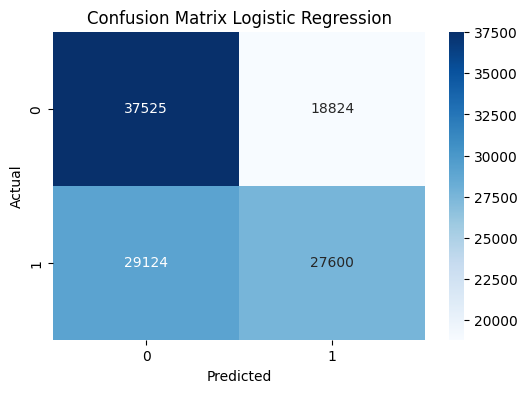

In [ ]:
print("Classification Report (Validation Set):")
print(classification_report(y_val, val_preds))

# Confusion matrix
cm = confusion_matrix(y_val, val_preds)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Random Forest

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(
    random_state=42,
    verbose=1,
    n_jobs=-1,
    n_estimators=200,
    max_features='log2',
    class_weight='balanced')

# Train model
rf_model.fit(X_train_selected_split, y_train_split)

val_preds = rf_model.predict(X_val_selected)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  6.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    8.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    8.4s finished


Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     56349
           1       0.97      0.90      0.93     56724

    accuracy                           0.94    113073
   macro avg       0.94      0.94      0.94    113073
weighted avg       0.94      0.94      0.94    113073



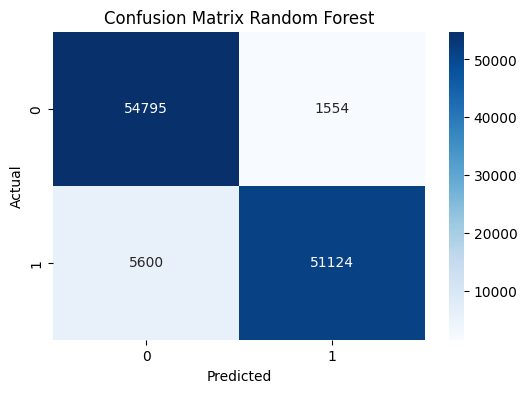

In [ ]:
print("Classification Report (Validation Set):")
print(classification_report(y_val, val_preds))

# Confusion matrix
cm = confusion_matrix(y_val, val_preds)

# confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from xgboost import XGBClassifier

# XGBoost Model
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train model
xgb_model.fit(X_train_selected_split, y_train_split)
val_preds = xgb_model.predict(X_val_selected)

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     56349
           1       0.98      0.90      0.94     56724

    accuracy                           0.94    113073
   macro avg       0.94      0.94      0.94    113073
weighted avg       0.94      0.94      0.94    113073



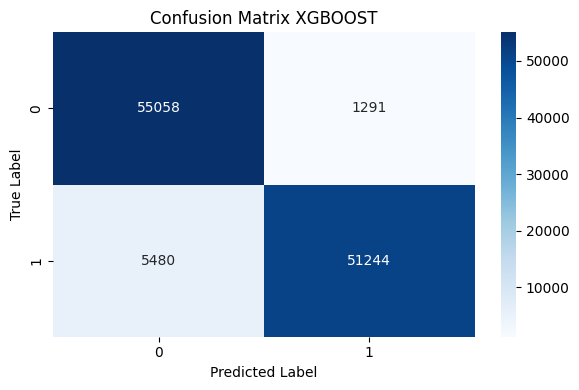

In [ ]:
print("Classification Report (Validation Set):")
print(classification_report(y_val, val_preds))

# Confusion matrix
cm = confusion_matrix(y_val, val_preds)

# confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=xgb_model.classes_,
            yticklabels=xgb_model.classes_)
plt.title("Confusion Matrix XGBOOST")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## Testing

In [ ]:
# Test With XG boost
test_preds = xgb_model.predict(X_test_selected)

In [ ]:
# Visualization
pred_counts = pd.Series(test_preds).value_counts().sort_index()
pred_counts

,count
0,26515
1,22229


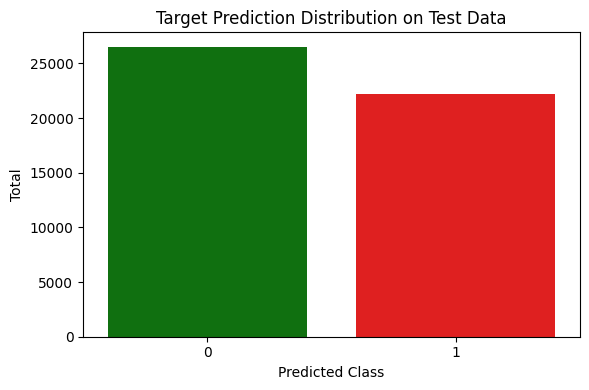

In [ ]:
# 0 = ree, 1 = green
custom_colors = ['green' if cls == 0 else 'red' for cls in pred_counts.index]

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=pred_counts.index, y=pred_counts.values, palette=custom_colors)
plt.title("Target Prediction Distribution on Test Data")
plt.xlabel("Predicted Class")
plt.ylabel("Total")
plt.tight_layout()
plt.show()